# **Data Preprocessing**

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
df = sns.load_dataset("tips")
print(df)


     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


In [2]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

# **Handling Outliers**

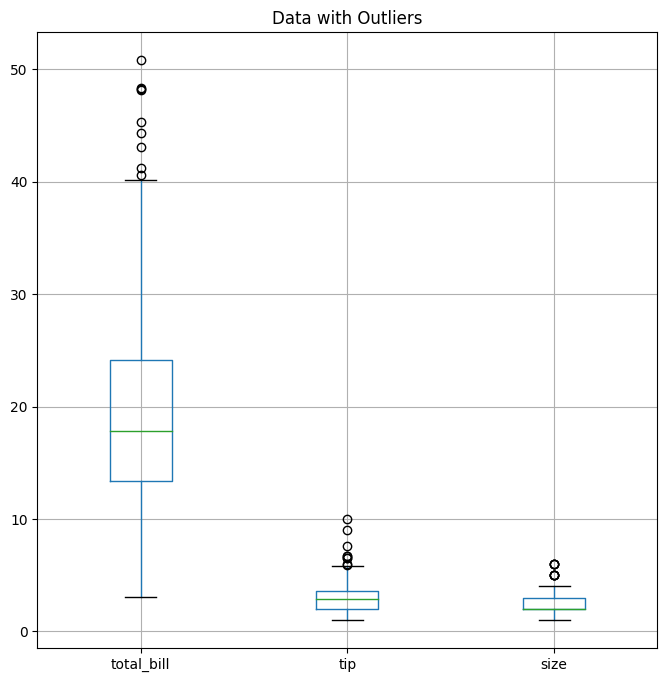

In [3]:
plt.figure(figsize=(8,8))
plt.title("Data with Outliers")
df.boxplot()
plt.show()


# **Removing Outliers**

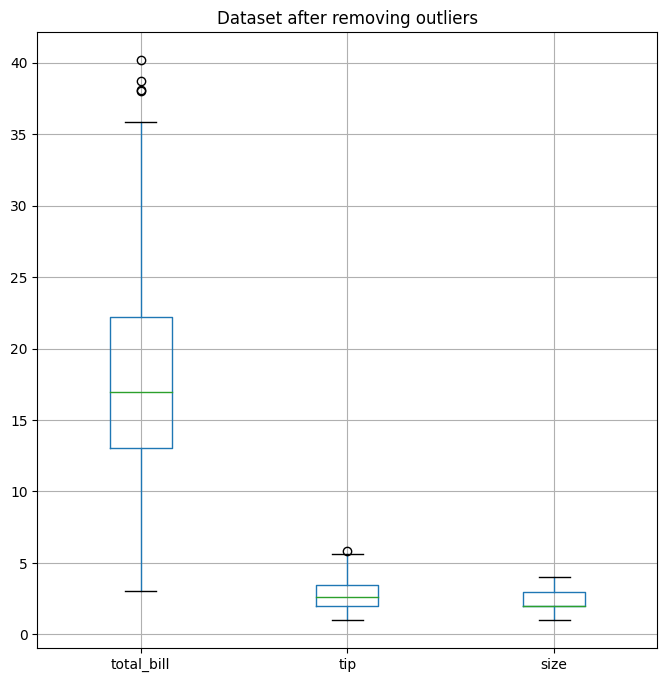

In [4]:
plt.figure(figsize=(8,8))
cols = ['size','tip','total_bill']
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
plt.title("Dataset after removing outliers")
df.boxplot()
plt.show()

# **1) Which day of the week has the highest total bill amount?**

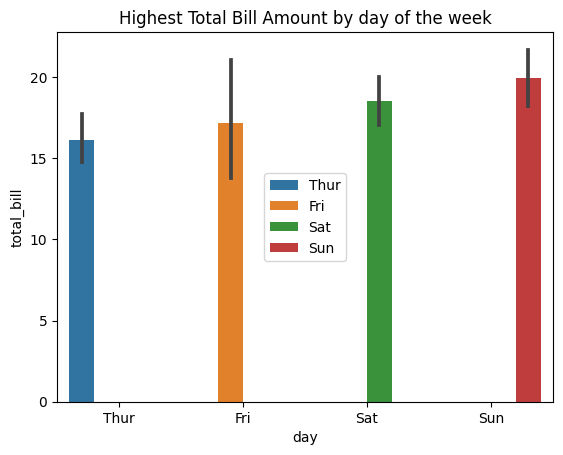

In [5]:
sns.barplot(x=df['day'], y=df['total_bill'], hue=df['day'])
plt.legend(loc="center")
plt.title("Highest Total Bill Amount by day of the week")
plt.show()


# **2) What is the average tip amount given by smokers and non-smokers?**

Text(0.5, 1.0, 'Average Tip Amount given by smokers and non-smokers')

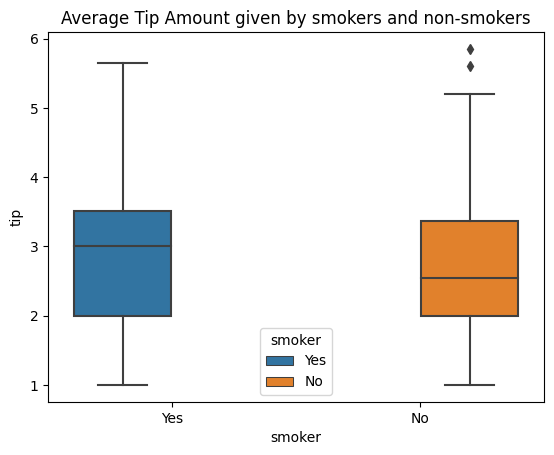

In [6]:
sns.boxplot(x=df['smoker'], y=df['tip'], hue=df['smoker'])
plt.title("Average Tip Amount given by smokers and non-smokers")

# **3) How does the tip percentage vary based on the size of the dining party?**

Text(0.5, 1.0, 'Tip Percentage by Dining Party Size')

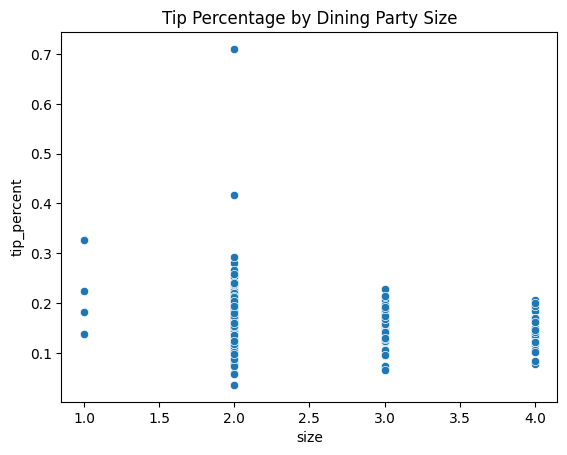

In [7]:
df["tip_percent"] = df["tip"] / df["total_bill"]
sns.scatterplot(x=df['size'],y=df['tip_percent'],data=df)
plt.title("Tip Percentage by Dining Party Size")

# **4) Which gender tends to leave higher tips?**

Text(0.5, 1.0, 'Tips based on gender')

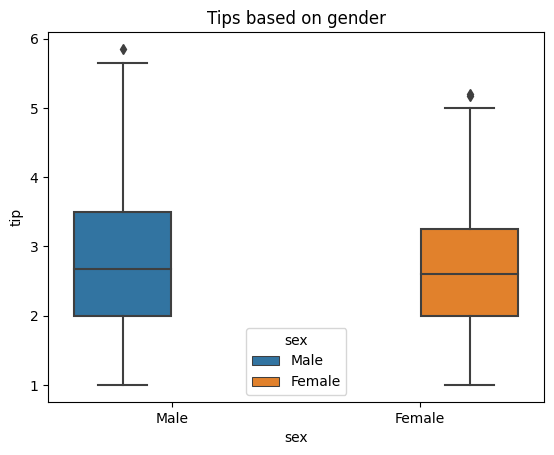

In [8]:
sns.boxplot(x=df['sex'], y=df['tip'],hue=df['sex'])
plt.title("Tips based on gender")

# **5) Is there any relationship between the total bill amount and the day of the week?**



Text(0.5, 1.0, 'Total bill amount by day of the week')

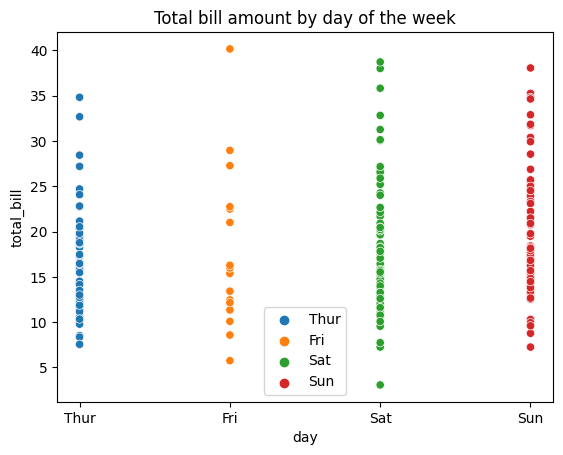

In [9]:
sns.scatterplot(x=df['day'],y=df['total_bill'],hue=df['day'])
plt.legend(loc="best")
plt.title("Total bill amount by day of the week")


# **6) How does the distribution of total bill amounts vary across different time periods (lunch vs. dinner)?**

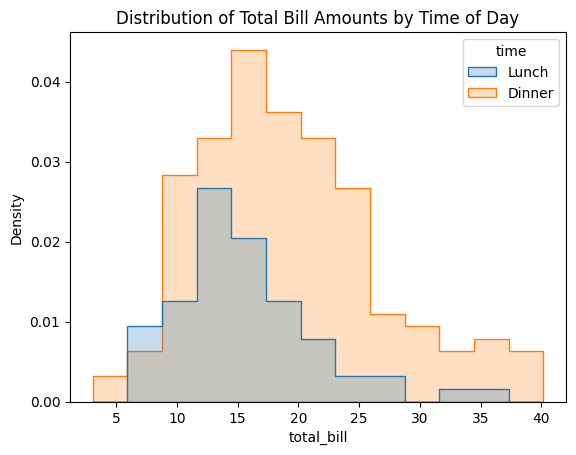

In [10]:
sns.histplot(data=df, x="total_bill", hue="time", element="step", stat="density")
plt.title("Distribution of Total Bill Amounts by Time of Day")
plt.show()

# **7) Which dining party size group tends to have the highest average total bill amount?**

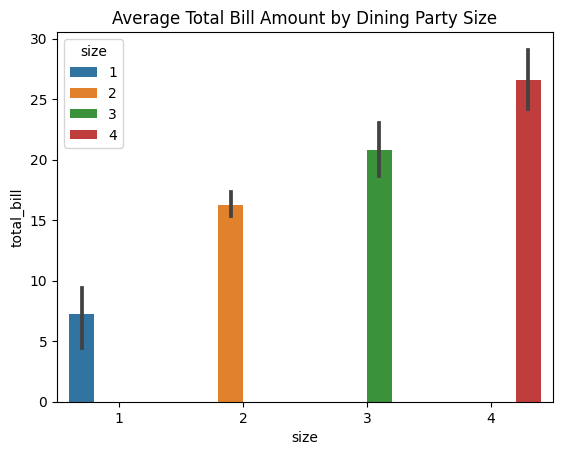

In [11]:
sns.barplot(x=df['size'],y=df['total_bill'],hue=df['size'])
plt.title("Average Total Bill Amount by Dining Party Size")
plt.show()

# **8) What is the distribution of tip amounts for each day of the week?**

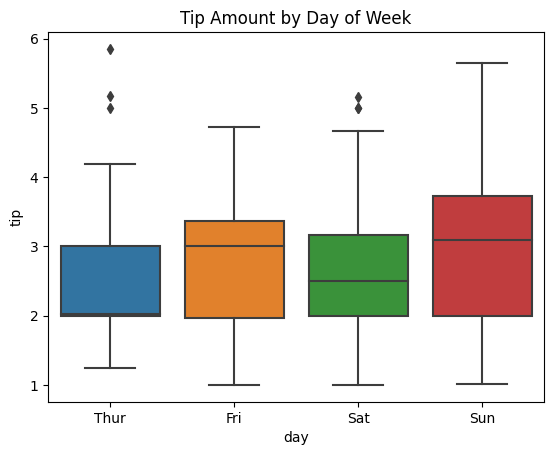

In [12]:
sns.boxplot(x="day", y="tip", data=df)
plt.title("Tip Amount by Day of Week")
plt.show()

# **9) How does the tip amount vary based on the type of service (lunch vs. dinner)?**

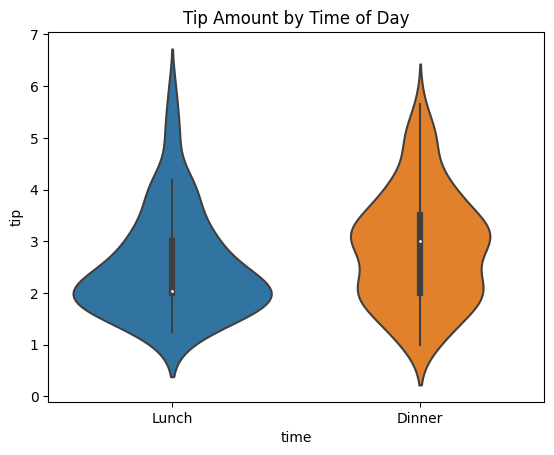

In [13]:
sns.violinplot(x="time", y="tip", data=df)
plt.title("Tip Amount by Time of Day")
plt.show()

# **10) Is there any correlation between the total bill amount and the tip amount?**

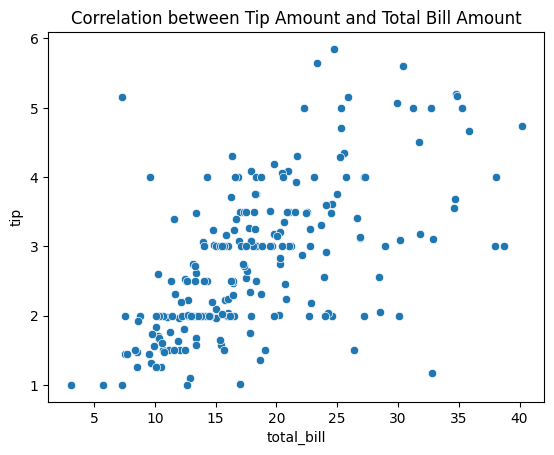

In [14]:
sns.scatterplot(x="total_bill", y="tip", data=df)
plt.title("Correlation between Tip Amount and Total Bill Amount")
plt.show()